# CNN on mnist (with and without maxpooling)

In [12]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [13]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [14]:
x_train=x_train/255
x_test=x_test/255

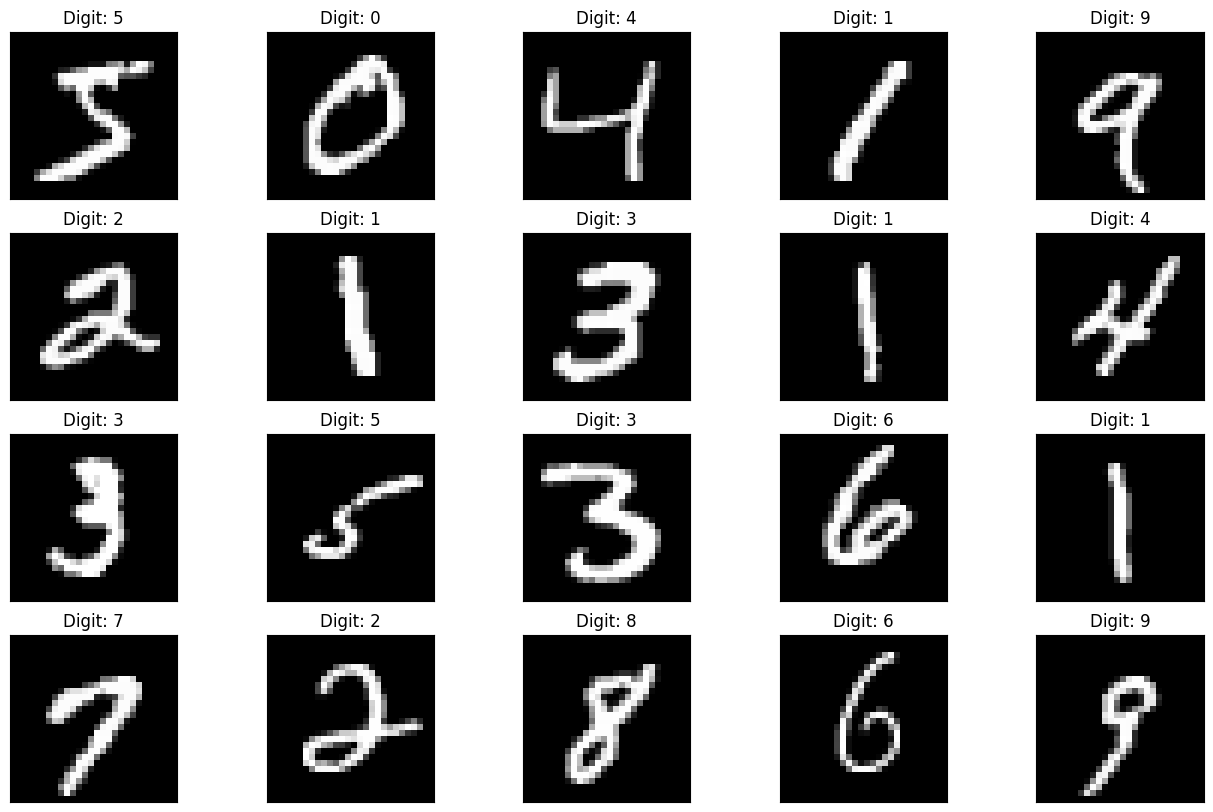

In [16]:
def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i+1)
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.title(f'Digit: {digit}')
    plt.xticks([])
    plt.yticks([])

plt.figure(figsize=(16,10))
for i in range(20):
    plot_digit(x_train[i], y_train[i], plt, i)

plt.show()

In [17]:
x_train=x_train.reshape((x_train.shape+(1,)))
y_train=y_train.reshape((y_train.shape+(1,)))
x_train.shape

(60000, 28, 28, 1)

In [18]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten

## Without Maxpooling

In [19]:
#without maxpooling
model=Sequential([
    Conv2D(64,input_shape=(28,28,1),activation='relu',kernel_size=(3,3),strides=(2,2)),
    Conv2D(64,activation='relu',kernel_size=(3,3),strides=(2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='sigmoid')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        640       
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 6, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 2304)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               295040    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 333,898
Trainable params: 333,898
Non-trainable params: 0
_________________________________________________________________


In [20]:
from keras.optimizers import SGD
optimizer=SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=20,validation_split=0.2,batch_size=32)

Epoch 1/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2747 - accuracy: 0.9178 - val_loss: 0.1069 - val_accuracy: 0.9678
Epoch 2/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0810 - accuracy: 0.9749 - val_loss: 0.0837 - val_accuracy: 0.9740
Epoch 3/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0535 - accuracy: 0.9833 - val_loss: 0.0708 - val_accuracy: 0.9790
Epoch 4/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0403 - accuracy: 0.9865 - val_loss: 0.0612 - val_accuracy: 0.9812
Epoch 5/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0274 - accuracy: 0.9911 - val_loss: 0.0558 - val_accuracy: 0.9838
Epoch 6/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0220 - accuracy: 0.9928 - val_loss: 0.0635 - val_accuracy: 0.9822
Epoch 7/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0158 - accuracy: 0.9949 - val_loss: 0.0722 - val_accurac

In [21]:
print('Train Accuracy: ', max(history.history['accuracy']))
print('Test Accuracy: ', max(history.history['val_accuracy']))

Train Accuracy:  1.0
Test Accuracy:  0.9871666431427002


1/1 [==============================] - 0s 32ms/step


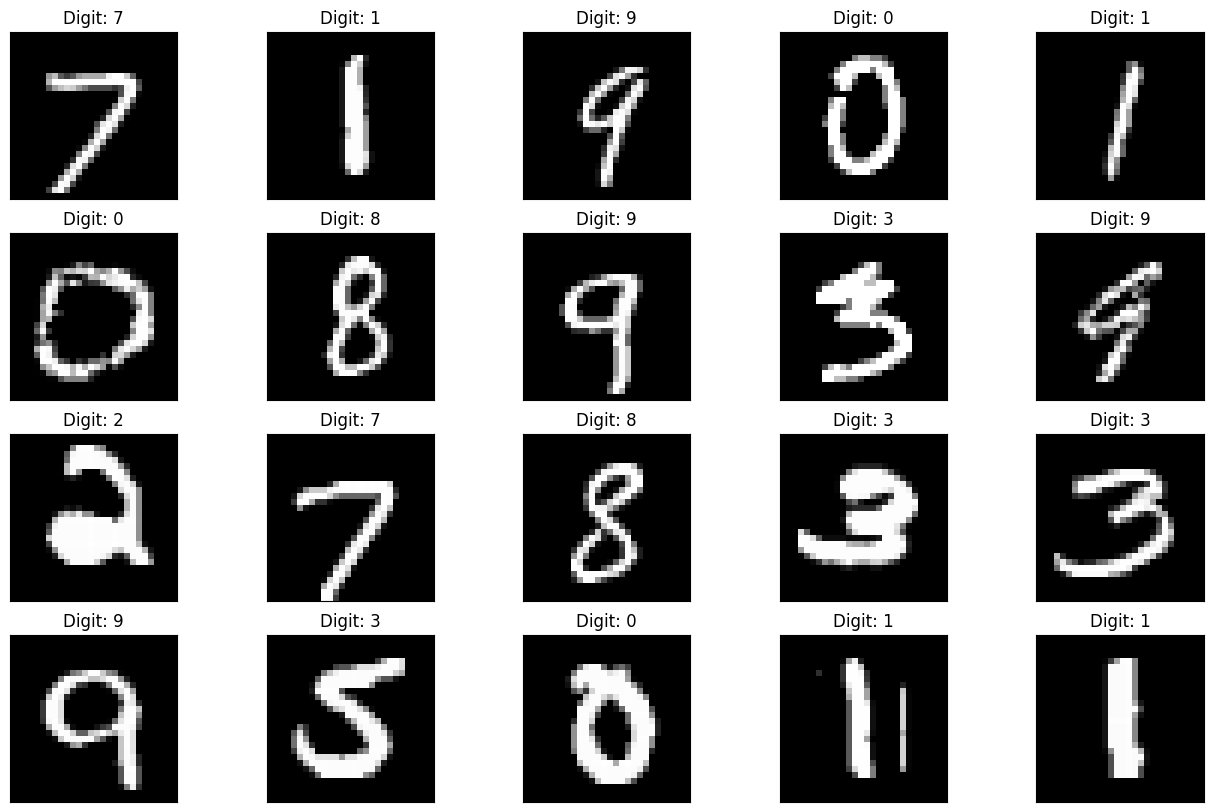

In [24]:
import random
plt.figure(figsize=(16, 10))
for i in range(20):
    image = random.choice(x_test).squeeze()  # Corrected here
    digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0], axis=-1)
    plot_digit(image, digit, plt, i)

plt.show()

## Using MaxPooing

In [25]:
from keras.layers import MaxPooling2D

In [26]:
model2=Sequential([
    Conv2D(64,input_shape=(28,28,1),activation='relu',kernel_size=(3,3),strides=(2,2)),
    MaxPooling2D(2,2),
    Conv2D(64,activation='relu',kernel_size=(3,3),strides=(2,2)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 13, 13, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 2, 2, 64)          36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 1, 1, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [27]:
optimizer=SGD(learning_rate=0.01,momentum=0.9)
model2.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history2=model2.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 12s 7ms/step - loss: 0.4767 - accuracy: 0.8509 - val_loss: 0.1600 - val_accuracy: 0.9510
Epoch 2/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1456 - accuracy: 0.9551 - val_loss: 0.1187 - val_accuracy: 0.9636
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1037 - accuracy: 0.9671 - val_loss: 0.1276 - val_accuracy: 0.9616
Epoch 4/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0847 - accuracy: 0.9723 - val_loss: 0.0858 - val_accuracy: 0.9744
Epoch 5/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0688 - accuracy: 0.9780 - val_loss: 0.0896 - val_accuracy: 0.9737
Epoch 6/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0583 - accuracy: 0.9817 - val_loss: 0.0902 - val_accuracy: 0.9715
Epoch 7/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0505 - accuracy: 0.9838 - val_loss: 0.0839 - val_accurac

In [28]:
print('Train Accuracy: ', max(history2.history['accuracy']))
print('Test Accuracy: ', max(history2.history['val_accuracy']))

Train Accuracy:  0.9973541498184204
Test Accuracy:  0.9809166789054871


1/1 [==============================] - 0s 25ms/step


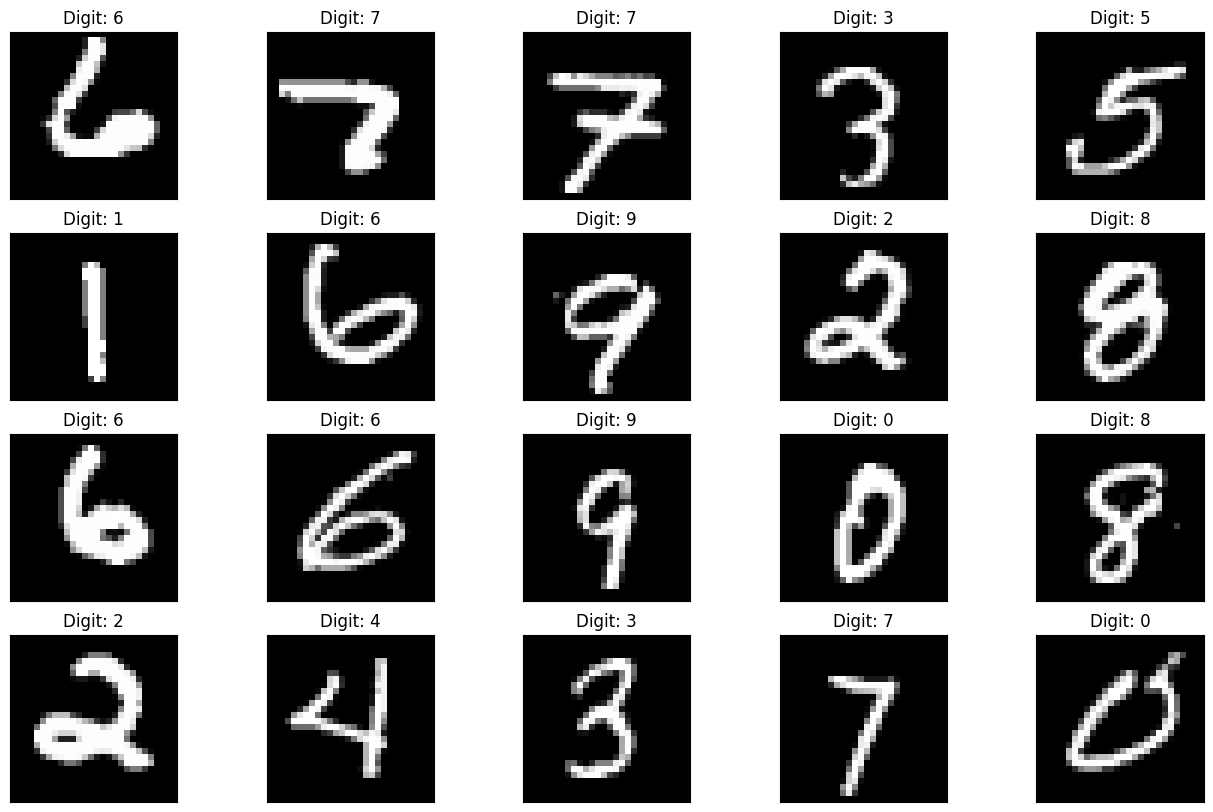

In [29]:
plt.figure(figsize=(16, 10))
for i in range(20):
    image = random.choice(x_test).squeeze()  # Corrected here
    digit = np.argmax(model2.predict(image.reshape((1, 28, 28, 1)))[0], axis=-1)
    plot_digit(image, digit, plt, i)

plt.show()